In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Loading in the Data and Functions

In [2]:
united = Table.read_table('data/united.csv')
united_bins = np.arange(-20, 300, 10)
united.show(5)

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64


In [3]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [5]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

## Distribution of the Sample Average

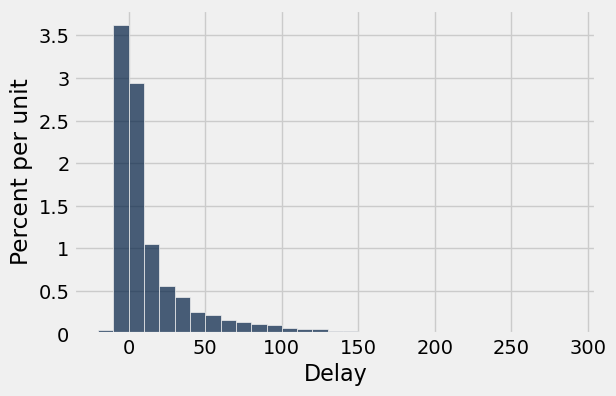

In [6]:
united.hist('Delay', bins=united_bins)

In [7]:
# How many possible sample means are there?
13825 ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

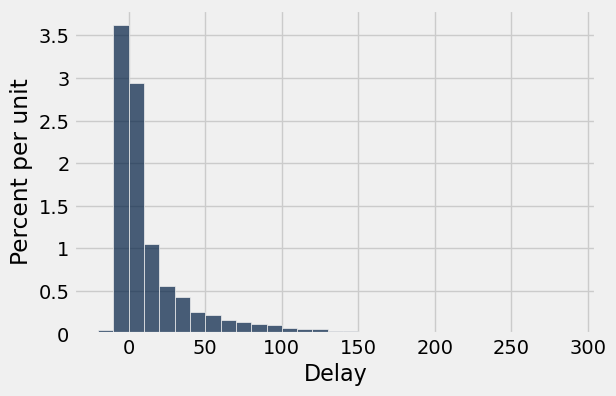

In [8]:
united.hist('Delay', bins=united_bins)

In [9]:
means_tbl = Table().with_columns(
    '100', ten_thousand_sample_means(100),
    '256', ten_thousand_sample_means(256),
    '400', ten_thousand_sample_means(400),
    '625', ten_thousand_sample_means(625),
    '900', ten_thousand_sample_means(900)
)

In [10]:
means_tbl

100,256,400,625,900
15.76,18.5859,18.4225,15.2144,15.1856
17.4,18.4062,15.1875,20.208,18.9111
26.35,15.375,15.27,17.7488,17.0244
19.77,18.7266,14.67,19.6512,14.3744
19.22,17.2891,15.47,18.3776,16.6278
9.86,14.9727,14.79,15.9552,19.54
15.98,15.6094,17.7025,15.5904,15.7978
29.1,13.0547,15.5275,15.7776,16.6856
15.1,18.1562,19.08,17.4672,15.6311
9.25,16.5547,17.95,17.4304,19.6833


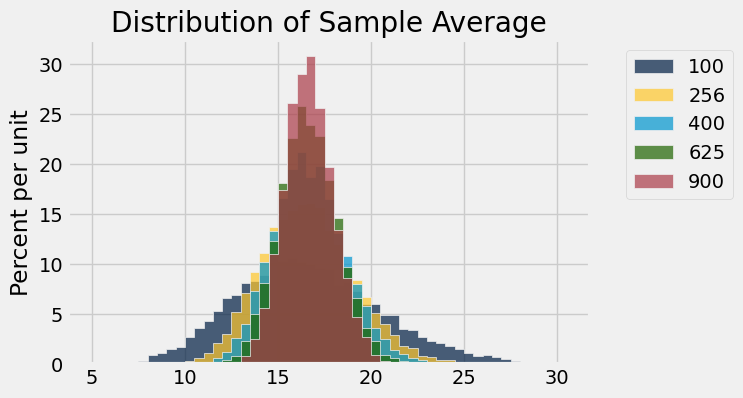

In [11]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

## Variability of the Sample Average

In [12]:
delay_mean = np.mean(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))

In [13]:
delay_mean

16.658155515370705

In [14]:
delay_sd

39.480199851609314

In [15]:
"""Empirical distribution of random sample means"""

def summarize_sample_means():
        
    print("Population mean:", delay_mean)
    print("Population SD:", delay_sd)
    
    for i in np.arange(len(means_tbl)):
        print('')
        print("Sample size: ", means_tbl.labels[i])
        print("Average of sample means: ", np.mean(means_tbl.column(i)))
        print("SD of sample means:", np.std(means_tbl.column(i)))
        print("Ratio of Pop SD to SD of sample means", delay_sd / np.std(means_tbl.column(i)))

In [16]:
summarize_sample_means()

Population mean: 16.6581555154
Population SD: 39.4801998516

Sample size:  100
Average of sample means:  16.665832
SD of sample means: 3.9639010946
Ratio of Pop SD to SD of sample means 9.95993565667

Sample size:  256
Average of sample means:  16.6125574219
SD of sample means: 2.48132516516
Ratio of Pop SD to SD of sample means 15.9109335632

Sample size:  400
Average of sample means:  16.66616025
SD of sample means: 1.96658214345
Ratio of Pop SD to SD of sample means 20.0755406953

Sample size:  625
Average of sample means:  16.64780368
SD of sample means: 1.58651211565
Ratio of Pop SD to SD of sample means 24.8849028395

Sample size:  900
Average of sample means:  16.6578885556
SD of sample means: 1.32355943836
Ratio of Pop SD to SD of sample means 29.8288076134
